# Import Needed Libraries

In [1]:
!pip install sklearn
!pip install matplotlib
!pip install seaborn

In [3]:
%pylab inline
%matplotlib inline


# Data Analysis lib imports
import pandas as pd
import numpy as np

# import ML libs
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge ,RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score ,KFold ,GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PolynomialFeatures
from sklearn.pipeline import make_pipeline , Pipeline

# import visual libs
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Reading file

In [12]:
df = pd.read_excel("All_Scribed_Data.xlsx")
df = df.drop("Unnamed: 0",axis = 1)

In [13]:
num_col = np.array(df.select_dtypes(["float64","int64"]).columns)

# Feature ENG. target

In [14]:
# https://www.calculatorsoup.com/calculators/financial/discount-calculator.php
df["discount_percentage"] = ((df["Oregnal_price"] - df["Discount_price"])/df["Oregnal_price"])*100

# Data Cleaning before

In [15]:
df = df.dropna().reset_index()

# MVP
- Basemodel 
- Cross Valedation + KFold = average of the scores came from CV
- plot for y and y_predict for train and val sets with Basemodel

## Beasline Model

In [16]:
# split the data to val and test
train, test = train_test_split(df, test_size = 0.2)
train, val = train_test_split(train , test_size = 0.25)

In [17]:
# LR baseline model
baseline_model = LinearRegression()
baseline_model.fit(train[num_col], train["discount_percentage"])


print("training score :", round(baseline_model.score(train[num_col], train["discount_percentage"]) ,5))
print("val score :", round(baseline_model.score(val[num_col], val["discount_percentage"]),5))

training score : 0.88038
val score : 0.87838


## Cross Valedation + KFold

In [18]:
kf = KFold(n_splits=5, shuffle=True, random_state = 1000)

print("all R^2: ", cross_val_score(baseline_model,train[num_col], train["discount_percentage"], cv=kf, scoring='r2'))
print("the avrage R^2: ",np.mean(cross_val_score(baseline_model,train[num_col], train["discount_percentage"], cv=kf, scoring='r2')))

all R^2:  [0.86726928 0.88230042 0.88127005 0.88402708 0.88584258]
the avrage R^2:  0.8801418821921654


## Baseline Preformence Plots

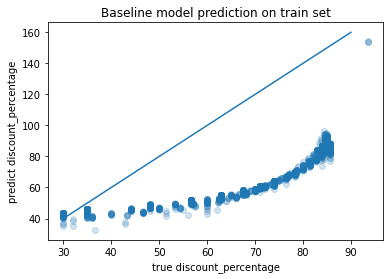

In [19]:
plt.scatter(train["discount_percentage"], baseline_model.predict(train[num_col]), alpha=0.2)
plt.xlabel("true discount_percentage")
plt.ylabel("predict discount_percentage")
plt.title("Baseline model prediction on train set")
plt.plot([30, 90], [40, 160])

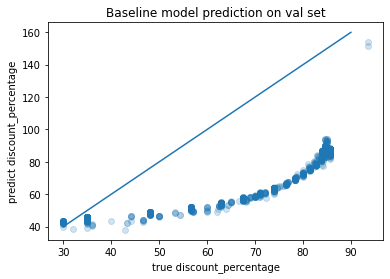

In [20]:
plt.scatter(val["discount_percentage"], baseline_model.predict(val[num_col]), alpha=0.2)
plt.xlabel("true discount_percentage")
plt.ylabel("predict discount_percentage")
plt.title("Baseline model prediction on val set")
plt.plot([30, 90], [40, 160])